# Content based recommender system

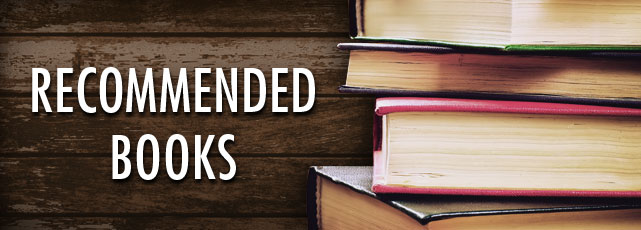

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv( '/Users/cdmstudent/Desktop/DSC-540 Adv ML/Final Project/ChatBot/PersonalizedBookSearch/goodbooks-10k/books.csv' )
data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [2]:
data.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [3]:
data.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

# Data Preprocessing
## Things to do:
### ->Extract only relevant columns (the ones having text we need)
### ->Check if there are null values in extracted columns

In [4]:
#Extract relevant columns that would influence a book's rating based on book title. 
books_title = data[['book_id', 'title']]
books_title.head()

,book_id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


## For content based book recommendation we have to use NLP techniques like
Keyword extraction -> Extract keywords from title

Cosine Similarity -> Find cosine similarity between all movie titles

## For keyword extraction we use one of the below based on our need,

### CountVectorizer- 
	Provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

### Tf-Idf Vectorizer- 
	Tf-Idf finds the no. of times a word occurs in a document and then compares this count to the no. of times the word shows up in a bunch of other documents in a collection. It then generates a rank for each word where it is important to a document if it shows up a lot in that particular document but doesn’t show up a lot in all the other documents.
    
We will use CountVectorizer as we want to extract keywords just from book titles.

### Count Vectorizer
	Convert a collection of text documents to a matrix of token counts. It's a data table that is obtained after normalization of next-generation sequencing data.
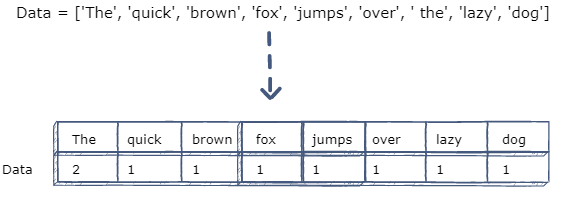

In [5]:
#Lets vectorize all these titles
from sklearn.feature_extraction.text import CountVectorizer

#initialize vectorizer
vect = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002) #min_df = rare words, max_df = most used words
#ngram_range = (1,2) - if used more than  1(value), lots of features or noise

#Fit into the title
vect.fit(books_title['title'])
title_matrix = vect.transform(books_title['title'])
title_matrix.shape

(10000, 261)

In [6]:
#Lets find vocabulary/features
features = vect.get_feature_names()
features

/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['01',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '39',
 'adventures',
 'alex',
 'alex cross',
 'america',
 'american',
 'angel',
 'angels',
 'anita',
 'anita blake',
 'apprentice',
 'art',
 'bad',
 'batman',
 'beautiful',
 'beauty',
 'best',
 'big',
 'black',
 'blake',
 'blake vampire',
 'blood',
 'blue',
 'body',
 'bone',
 'bones',
 'book',
 'books',
 'born',
 'bosch',
 'bosch universe',
 'boy',
 'boys',
 'broken',
 'brothers',
 'case',
 'cat',
 'child',
 'children',
 'chronicles',
 'circle',
 'city',
 'club',
 'complete',
 'confessions',
 'cross',
 'cycle',
 'dance',
 'dark',
 'dark hunter',
 'darkest',
 'darkness',
 'daughter',
 'davenport',
 'dawn',
 'day',
 'days',
 'dead',
 'death',
 'death death',
 'detective',
 'devil',
 'diaries',
 'diary',
 'die',
 'discworld',
 'dog',
 'don',
 'dragon',
 'dream',
 'dreams',
 'earth',
 'empire',
 'end',
 'fall',
 'fallen',
 'family',
 'fear',
 'files',
 'food',
 'forever',
 'forgotten',
 'forgotten realms',
 'game',
 'garden',
 'girl'

### Cosine Similarity between Titles
### Things to do:

Initialize Cosine similarity into title matrix

Extract features from book title

Using Cosine similarity between this title and all other titles to be recommended the top 10 books

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_titles = cosine_similarity(title_matrix, title_matrix)
cosine_sim_titles.shape

(10000, 10000)

In [8]:
#Get books which are similar to a given title
title_id = 100
books_title['title'].iloc[title_id]

'Me Talk Pretty One Day'

In [9]:
#Find out what features have been considered  by the vectorizer for a given title ?
feature_array = np.squeeze(title_matrix[title_id].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)
idx[0]
[features[x] for x in idx[0]]

['day', 'pretty']

In [10]:
# Find index of feature
idx[0]

array([ 63, 179])

In [11]:
#Cosine similarity with other similar titles
n = 15 #how many books to be recommended
top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id,]), axis = 0)[0:n]
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]
top_n_sim_values

array([1.        , 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678])

In [12]:
#find top n with values > 0
top_n_idx = top_n_idx[top_n_sim_values > 0]
#Matching books
books_title['title'].iloc[top_n_idx]

100                                Me Talk Pretty One Day
3729                                            Labor Day
988                                 The Day of the Jackal
836                             Every Day (Every Day, #1)
2348    No Easy Day: The Firsthand Account of the Miss...
3311                                          Pretty Baby
6804                     Graduation Day (The Testing, #3)
6886                                 Day Watch (Watch #2)
5765                          The Given Day (Coughlin #1)
783                                      For One More Day
9210             Beyond Exile (Day by Day Armageddon,# 2)
9703    The Pretty Committee Strikes Back (The Clique,...
9637                                 Day 21 (The 100, #2)
7330                                      Pretty in Plaid
7707                            A Grown-Up Kind of Pretty
Name: title, dtype: object

In [13]:
# lets wrap the above code in a function
def return_sim_books(title_id, title_matrix, vectorizer, top_n = 10):
    
    # generate sim matrix
    sim_matrix = cosine_similarity(title_matrix, title_matrix)
    features = vectorizer.get_feature_names()

    top_n_idx = np.flip(np.argsort(sim_matrix[title_id,]),axis=0)[0:top_n]
    top_n_sim_values = sim_matrix[title_id, top_n_idx]
    
    # find top n with values > 0
    top_n_idx = top_n_idx[top_n_sim_values > 0]
    scores = top_n_sim_values[top_n_sim_values > 0]
    
    
    # find features from the vectorized matrix
    sim_books_idx = books_title['title'].iloc[top_n_idx].index
    words = []
    for book_idx in sim_books_idx:
        try:
            feature_array = np.squeeze(title_matrix[book_idx,].toarray())
        except:
            feature_array = np.squeeze(title_matrix[book_idx,])
        idx = np.where(feature_array > 0)
        words.append([" , ".join([features[i] for i in idx[0]])])
        
    # collate results
    res = pd.DataFrame({"book_title" : books_title['title'].iloc[title_id],
           "sim_books": books_title['title'].iloc[top_n_idx].values,"words":words,
           "scores":scores}, columns = ["book_title","sim_books","scores","words"])
    
    
    return res

In [14]:
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect.fit(books_title['title'])
title_matrix = vect.transform(books_title['title'])
print(books_title['title'][10])
return_sim_books(10,title_matrix,vect,top_n=10)

The Kite Runner


,book_title,sim_books,scores,words


"The Kite Runner" It was unable to recommend similar books because of the rare words like kite in the dataset so we have to look at other better ways for recommendations.

## Using Tf-Idf Vectorizer
Here we consider overall document weightage of a word, useful while dealing with most frequent words

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(books_title['title'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
titles = books_title['title']
indices = pd.Series(books_title.index, index = books_title['title']) #converting all titles into a Series

#Function that gets book recommendations based on the cosine similarity score of book titles
def book_recommendations(title, n):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:n+1]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [17]:
#Recommend n books for a book having index 1
book_index = 10
n = 20

print(books_title['title'][book_index])
book_recommendations(books_title.title[book_index],n)

The Kite Runner


8946                                        Once a Runner
90                      The Maze Runner (Maze Runner, #1)
375                      The Death Cure (Maze Runner, #3)
945                    The Kill Order (Maze Runner, #0.5)
258                   The Scorch Trials (Maze Runner, #2)
6711    Ultramarathon Man: Confessions of an All-Night...
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
7                                  The Catcher in the Rye
8                   Angels & Demons  (Robert Langdon, #1)
9                                     Pride and Prejudice
11                              Divergent (Divergent, #1)
12            